In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [2]:
os.chdir("..")
print(os.getcwd())

c:\Users\valen\Desktop\etl_workshop002


In [3]:
spotify_df = pd.read_csv("data/raw/spotify_dataset.csv")
spotify_df.head()

,Unnamed: 0,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,...,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
0,0,5SuOikwiRyPMVoIQDJUgSV,Gen Hoshino,Comedy,Comedy,73,230666,False,0.676,0.4610,...,-6.746,0,0.1430,0.0322,0.000001,0.3580,0.715,87.917,4,acoustic
1,1,4qPNDBW1i3p13qLCt0Ki3A,Ben Woodward,Ghost (Acoustic),Ghost - Acoustic,55,149610,False,0.420,0.1660,...,-17.235,1,0.0763,0.9240,0.000006,0.1010,0.267,77.489,4,acoustic
2,2,1iJBSr7s7jYXzM8EGcbK5b,Ingrid Michaelson;ZAYN,To Begin Again,To Begin Again,57,210826,False,0.438,0.3590,...,-9.734,1,0.0557,0.2100,0.000000,0.1170,0.120,76.332,4,acoustic
3,3,6lfxq3CG4xtTiEg7opyCyx,Kina Grannis,Crazy Rich Asians (Original Motion Picture Sou...,Can't Help Falling In Love,71,201933,False,0.266,0.0596,...,-18.515,1,0.0363,0.9050,0.000071,0.1320,0.143,181.740,3,acoustic
4,4,5vjLSffimiIP26QG5WcN2K,Chord Overstreet,Hold On,Hold On,82,198853,False,0.618,0.4430,...,-9.681,1,0.0526,0.4690,0.000000,0.0829,0.167,119.949,4,acoustic


In [4]:
spotify_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 114000 entries, 0 to 113999
Data columns (total 21 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Unnamed: 0        114000 non-null  int64  
 1   track_id          114000 non-null  object 
 2   artists           113999 non-null  object 
 3   album_name        113999 non-null  object 
 4   track_name        113999 non-null  object 
 5   popularity        114000 non-null  int64  
 6   duration_ms       114000 non-null  int64  
 7   explicit          114000 non-null  bool   
 8   danceability      114000 non-null  float64
 9   energy            114000 non-null  float64
 10  key               114000 non-null  int64  
 11  loudness          114000 non-null  float64
 12  mode              114000 non-null  int64  
 13  speechiness       114000 non-null  float64
 14  acousticness      114000 non-null  float64
 15  instrumentalness  114000 non-null  float64
 16  liveness          11

taking into account the fact that w alredy have a trck id im gonna drop the unnamed column cause it is only adding noise to the info.

Also, given the analysis goal the following columns will be eliminated

In [5]:
spotify_df = spotify_df.drop(columns=["Unnamed: 0", "key", "mode", "time_signature", "liveness"])

In [6]:
spotify_df.describe()

,popularity,duration_ms,danceability,energy,loudness,speechiness,acousticness,instrumentalness,valence,tempo
count,114000.000000,1.140000e+05,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000
mean,33.238535,2.280292e+05,0.566800,0.641383,-8.258960,0.084652,0.314910,0.156050,0.474068,122.147837
std,22.305078,1.072977e+05,0.173542,0.251529,5.029337,0.105732,0.332523,0.309555,0.259261,29.978197
min,0.000000,0.000000e+00,0.000000,0.000000,-49.531000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,17.000000,1.740660e+05,0.456000,0.472000,-10.013000,0.035900,0.016900,0.000000,0.260000,99.218750
50%,35.000000,2.129060e+05,0.580000,0.685000,-7.004000,0.048900,0.169000,0.000042,0.464000,122.017000
75%,50.000000,2.615060e+05,0.695000,0.854000,-5.003000,0.084500,0.598000,0.049000,0.683000,140.071000
max,100.000000,5.237295e+06,0.985000,1.000000,4.532000,0.965000,0.996000,1.000000,0.995000,243.372000


In [7]:
spotify_df.describe(include = "object")

,track_id,artists,album_name,track_name,track_genre
count,114000,113999,113999,113999,114000
unique,89741,31437,46589,73608,114
top,6S3JlDAGk3uu3NtZbPnuhS,The Beatles,Alternative Christmas 2022,Run Rudolph Run,acoustic
freq,9,279,195,151,1000


In [8]:
spotify_df.describe(include = "bool")

,explicit
count,114000
unique,2
top,False
freq,104253


Note that track_id should be unique for each song which means that if we have 114000 records there should be 114000 track_id otherwise its probable that we have duplicate songs

In [9]:
spotify_df = spotify_df.drop_duplicates(subset='track_id')

In [10]:
print(f"Number of duplicates: {spotify_df.duplicated().sum()}")

Number of duplicates: 0


In [11]:
spotify_df['artists'] = (
    spotify_df['artists']
    .str.strip()  # Elimina espacios al inicio/final
    .str.replace(r'[\'"]', '', regex=True)  # Elimina comillas simples y dobles
    .str.replace(r'\s+', ' ', regex=True)  # Reemplaza múltiples espacios por uno solo
)

# Normalizar track_name (mismo proceso)
spotify_df['track_name'] = (
    spotify_df['track_name']
    .str.strip()  # Elimina espacios al inicio/final
    .str.replace(r'[\'"]', '', regex=True)  # Elimina comillas simples y dobles
    .str.replace(r'\s+', ' ', regex=True)  # Reemplaza múltiples espacios por uno solo
)

In [12]:
# Crear una columna con el primer artista (útil para merges)
spotify_df['primary_artist'] = spotify_df['artists'].str.split(';').str[0]

# Opcional: Explotar la lista de artistas (una fila por artista)
# df_exploded = df_spotify.assign(artists=df_spotify['artists'].str.split(';')).explode('artists')

In [13]:
value = "Колыбельная-земля"
spotify_df[spotify_df["primary_artist"]==value]

,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,loudness,speechiness,acousticness,instrumentalness,valence,tempo,track_genre,primary_artist
113856,6XsYJ0dwT2hRzp0Qles78F,Колыбельная-земля,Расслабляющие звуки - белый шум для вашего реб...,Пылесос (Белый шум),22,302185,False,0.0,0.224,-10.224,0.0,0.142,0.986,0.0,0.0,world-music,Колыбельная-земля


In [14]:
# Crear columna 'is_feature'  
spotify_df['is_feature'] = spotify_df['artists'].str.contains(';').astype('bool') 

# Verificar  
print(spotify_df[['track_name', 'artists', 'is_feature']].sample(5))  

                                              track_name          artists  \
83730                                     Because Of You            Scorz   
51254                     MONTERO (Call Me By Your Name)        Lil Nas X   
15005                                        At My Worst      Pink Sweat$   
26055  Thats How You Know - From Enchanted/Soundtrack...        Amy Adams   
43646                        Porque Te Abates - Salmo 42  Trazendo a Arca   

       is_feature  
83730       False  
51254       False  
15005       False  
26055       False  
43646       False  


<Axes: xlabel='is_feature', ylabel='popularity'>

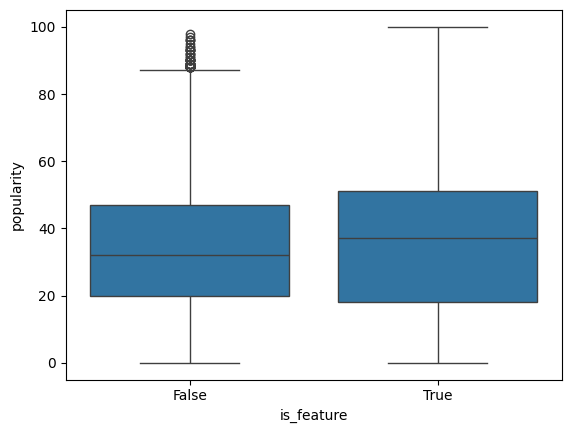

In [15]:
import seaborn as sns  

sns.boxplot(data=spotify_df, x='is_feature', y='popularity')  

In [16]:
spotify_df

,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,loudness,speechiness,acousticness,instrumentalness,valence,tempo,track_genre,primary_artist,is_feature
0,5SuOikwiRyPMVoIQDJUgSV,Gen Hoshino,Comedy,Comedy,73,230666,False,0.676,0.4610,-6.746,0.1430,0.0322,0.000001,0.7150,87.917,acoustic,Gen Hoshino,False
1,4qPNDBW1i3p13qLCt0Ki3A,Ben Woodward,Ghost (Acoustic),Ghost - Acoustic,55,149610,False,0.420,0.1660,-17.235,0.0763,0.9240,0.000006,0.2670,77.489,acoustic,Ben Woodward,False
2,1iJBSr7s7jYXzM8EGcbK5b,Ingrid Michaelson;ZAYN,To Begin Again,To Begin Again,57,210826,False,0.438,0.3590,-9.734,0.0557,0.2100,0.000000,0.1200,76.332,acoustic,Ingrid Michaelson,True
3,6lfxq3CG4xtTiEg7opyCyx,Kina Grannis,Crazy Rich Asians (Original Motion Picture Sou...,Cant Help Falling In Love,71,201933,False,0.266,0.0596,-18.515,0.0363,0.9050,0.000071,0.1430,181.740,acoustic,Kina Grannis,False
4,5vjLSffimiIP26QG5WcN2K,Chord Overstreet,Hold On,Hold On,82,198853,False,0.618,0.4430,-9.681,0.0526,0.4690,0.000000,0.1670,119.949,acoustic,Chord Overstreet,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
113995,2C3TZjDRiAzdyViavDJ217,Rainy Lullaby,#mindfulness - Soft Rain for Mindful Meditatio...,Sleep My Little Boy,21,384999,False,0.172,0.2350,-16.393,0.0422,0.6400,0.928000,0.0339,125.995,world-music,Rainy Lullaby,False
113996,1hIz5L4IB9hN3WRYPOCGPw,Rainy Lullaby,#mindfulness - Soft Rain for Mindful Meditatio...,Water Into Light,22,385000,False,0.174,0.1170,-18.318,0.0401,0.9940,0.976000,0.0350,85.239,world-music,Rainy Lullaby,False
113997,6x8ZfSoqDjuNa5SVP5QjvX,Cesária Evora,Best Of,Miss Perfumado,22,271466,False,0.629,0.3290,-10.895,0.0420,0.8670,0.000000,0.7430,132.378,world-music,Cesária Evora,False
113998,2e6sXL2bYv4bSz6VTdnfLs,Michael W. Smith,Change Your World,Friends,41,283893,False,0.587,0.5060,-10.889,0.0297,0.3810,0.000000,0.4130,135.960,world-music,Michael W. Smith,False


In [17]:
print(f"Dataset Shape: {spotify_df.shape}")
print("\nMissing Values per Column:")
print(spotify_df.isnull().sum().sort_values())

Dataset Shape: (89741, 18)

Missing Values per Column:
track_id            0
explicit            0
duration_ms         0
popularity          0
danceability        0
speechiness         0
loudness            0
energy              0
instrumentalness    0
valence             0
tempo               0
acousticness        0
track_genre         0
is_feature          0
track_name          1
album_name          1
artists             1
primary_artist      1
dtype: int64


In [18]:
spotify_df = spotify_df[spotify_df['artists'].notna()]

In [19]:
print("\nMissing Values per Column:")
print(spotify_df.isnull().sum().sort_values())


Missing Values per Column:
track_id            0
artists             0
album_name          0
track_name          0
popularity          0
duration_ms         0
explicit            0
danceability        0
energy              0
loudness            0
speechiness         0
acousticness        0
instrumentalness    0
valence             0
tempo               0
track_genre         0
primary_artist      0
is_feature          0
dtype: int64


In [20]:
spotify_df.loc[:, 'duration_min'] = round(spotify_df['duration_ms'] / (1000 * 60), 2)
spotify_df = spotify_df.drop(columns=['duration_ms'])

C:\Users\valen\AppData\Local\Temp\ipykernel_18212\2847782976.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  spotify_df.loc[:, 'duration_min'] = round(spotify_df['duration_ms'] / (1000 * 60), 2)


In [21]:
bins = [0, 3, 4, float('inf')]  
labels = ['Corta (<3 min)', 'Media (3-4 min)', 'Larga (>4 min)']  
spotify_df['duration_cat'] = pd.cut(spotify_df['duration_min'], bins=bins, labels=labels)  

In [22]:
spotify_df.head()

,track_id,artists,album_name,track_name,popularity,explicit,danceability,energy,loudness,speechiness,acousticness,instrumentalness,valence,tempo,track_genre,primary_artist,is_feature,duration_min,duration_cat
0,5SuOikwiRyPMVoIQDJUgSV,Gen Hoshino,Comedy,Comedy,73,False,0.676,0.4610,-6.746,0.1430,0.0322,0.000001,0.715,87.917,acoustic,Gen Hoshino,False,3.84,Media (3-4 min)
1,4qPNDBW1i3p13qLCt0Ki3A,Ben Woodward,Ghost (Acoustic),Ghost - Acoustic,55,False,0.420,0.1660,-17.235,0.0763,0.9240,0.000006,0.267,77.489,acoustic,Ben Woodward,False,2.49,Corta (<3 min)
2,1iJBSr7s7jYXzM8EGcbK5b,Ingrid Michaelson;ZAYN,To Begin Again,To Begin Again,57,False,0.438,0.3590,-9.734,0.0557,0.2100,0.000000,0.120,76.332,acoustic,Ingrid Michaelson,True,3.51,Media (3-4 min)
3,6lfxq3CG4xtTiEg7opyCyx,Kina Grannis,Crazy Rich Asians (Original Motion Picture Sou...,Cant Help Falling In Love,71,False,0.266,0.0596,-18.515,0.0363,0.9050,0.000071,0.143,181.740,acoustic,Kina Grannis,False,3.37,Media (3-4 min)
4,5vjLSffimiIP26QG5WcN2K,Chord Overstreet,Hold On,Hold On,82,False,0.618,0.4430,-9.681,0.0526,0.4690,0.000000,0.167,119.949,acoustic,Chord Overstreet,False,3.31,Media (3-4 min)


In [23]:
spotify_df = spotify_df.drop(columns=["track_id"])

In [24]:
spotify_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 89740 entries, 0 to 113999
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   artists           89740 non-null  object  
 1   album_name        89740 non-null  object  
 2   track_name        89740 non-null  object  
 3   popularity        89740 non-null  int64   
 4   explicit          89740 non-null  bool    
 5   danceability      89740 non-null  float64 
 6   energy            89740 non-null  float64 
 7   loudness          89740 non-null  float64 
 8   speechiness       89740 non-null  float64 
 9   acousticness      89740 non-null  float64 
 10  instrumentalness  89740 non-null  float64 
 11  valence           89740 non-null  float64 
 12  tempo             89740 non-null  float64 
 13  track_genre       89740 non-null  object  
 14  primary_artist    89740 non-null  object  
 15  is_feature        89740 non-null  bool    
 16  duration_min      89740 no

In [25]:
print(spotify_df['primary_artist'].nunique())  # Deberías ver nombres limpios como "zz top"

17647


In [26]:
spotify_df['primary_artist'].value_counts()

primary_artist
George Jones                 332
Wolfgang Amadeus Mozart      305
Pritam                       302
Hank Williams                243
my little airport            171
                            ... 
Grendel                        1
Angelspit                      1
Wynardtage                     1
Dan Berk                       1
Antonio Jesús Asiáin Sanz      1
Name: count, Length: 17647, dtype: int64

In [27]:
# Mostrar los primeros 50 artistas únicos para inspección manual
print(spotify_df['primary_artist'].unique()[:50])

['Gen Hoshino' 'Ben Woodward' 'Ingrid Michaelson' 'Kina Grannis'
 'Chord Overstreet' 'Tyrone Wells' 'A Great Big World' 'Jason Mraz'
 'Ross Copperman' 'Zack Tabudlo' 'Dan Berk' 'Anna Hamilton' 'Landon Pigg'
 'Andrew Foy' 'Boyce Avenue' 'Brandi Carlile' 'KT Tunstall' 'Eddie Vedder'
 'Highland Peak' 'Motohiro Hata' 'Andrew Belle' 'Ron Pope'
 'Adam Christopher' 'Aron Wright' 'Sara Bareilles' 'Kurt Cobain'
 'Tim Halperin' 'Canyon City' 'Aaron Espe' 'Tyler Ward'
 'Five For Fighting' 'Bailey Jehl' 'Drew Holcomb & The Neighbors'
 'Gabrielle Aplin' 'The Civil Wars' 'Callum J Wright' 'Mone Kamishiraishi'
 'John Adams' 'Kitri' 'Augustana' 'Matthew Perryman Jones'
 'Ray LaMontagne' 'Meg Birch' 'Catherine Feeny' 'Joshua Hyslop'
 'JJ Heller' 'Howie Day' 'Ben Rector' 'Matt Nathanson' 'Rachael Yamagata']


In [ ]:
# Agrupar por artista principal y calcular métricas promedio
df_spotify_artists = spotify_df.groupby('primary_artist', as_index=False).agg({
    'track_name': 'count', 
    'popularity': 'mean',        # Popularidad promedio
    'danceability': 'mean',      # Danceability promedio
    'energy': 'mean',
    'speechiness': 'mean',
    'instrumentalness': 'mean',         # Energy promedio
    'explicit': 'sum',           # Total de canciones explícitas
    'duration_min': 'mean',      # Duración promedio
    'is_feature': lambda x: (x.sum() / len(x)) * 100,   # Número de canciones en Spotify
    'track_genre': lambda x: x.mode()[0]  # Género más común
}).rename(columns={
    'track_name': 'total_tracks',
    'explicit': 'total_explicit_tracks',
    'is_feature': 'is_feature_pct'   # Renombrar para claridad
})

In [30]:
value = 79.000000
df_spotify_artists[df_spotify_artists["total_explicit_tracks"]== value]

,primary_artist,total_tracks,popularity,danceability,energy,total_explicit_tracks,duration_min,is_feature_pct,track_genre
16758,XXXTENTACION,98,61.479592,0.696122,0.475489,79,2.287041,31.632653,emo


In [31]:
df_spotify_artists['pct_explicit'] = (
    df_spotify_artists['total_explicit_tracks'] / df_spotify_artists['total_tracks'] * 100
)

In [32]:
df_spotify_artists

,primary_artist,total_tracks,popularity,danceability,energy,total_explicit_tracks,duration_min,is_feature_pct,track_genre,pct_explicit
0,!nvite,2,23.000000,0.8205,0.519000,0,2.285000,0.0,study,0.0
1,#Kids,1,34.000000,0.5800,0.494000,0,1.730000,100.0,children,0.0
2,$affie,2,41.000000,0.7825,0.215000,0,2.195000,50.0,study,0.0
3,&ME,1,50.000000,0.7720,0.485000,0,6.420000,100.0,deep-house,0.0
4,(DOLCH),1,22.000000,0.4100,0.618000,0,7.200000,0.0,black-metal,0.0
...,...,...,...,...,...,...,...,...,...,...
17642,黃仲崑,3,24.333333,0.5640,0.533333,0,3.226667,0.0,mandopop,0.0
17643,黃妃,2,24.000000,0.5500,0.649500,0,3.730000,0.0,mandopop,0.0
17644,黃小琥,1,56.000000,0.3340,0.431000,0,5.170000,0.0,mandopop,0.0
17645,黃敏華,1,20.000000,0.5490,0.478000,0,3.650000,0.0,cantopop,0.0


In [34]:
df_spotify_artists.describe()

,index,total_tracks,popularity,danceability,energy,explicit,duration_min,is_feature
count,17647.000000,17647.000000,17647.000000,17647.000000,17647.000000,17647.000000,17647.000000,17647.000000
mean,8823.000000,5.085284,36.312329,0.568883,0.629977,0.436561,3.762123,23.723084
std,5094.394436,10.628703,17.206795,0.164758,0.244444,2.022467,1.486477,37.377274
min,0.000000,1.000000,0.000000,0.000000,0.000020,0.000000,0.510000,0.000000
25%,4411.500000,1.000000,23.666667,0.468929,0.473000,0.000000,2.950000,0.000000
50%,8823.000000,2.000000,36.000000,0.581750,0.665400,0.000000,3.550294,0.000000
75%,13234.500000,5.000000,48.000000,0.689667,0.828667,0.000000,4.283333,42.857143
max,17646.000000,332.000000,99.000000,0.978000,1.000000,79.000000,60.000000,100.000000


In [31]:
df_spotify_artists.describe(include="object")

,primary_artist,track_genre
count,17647,17647
unique,17647,113
top,龍藏Ryuzo,french
freq,1,346


In [32]:
df_spotify_artists["primary_artist"].value_counts()

primary_artist
龍藏Ryuzo            1
!nvite             1
#Kids              1
$affie             1
&ME                1
                  ..
1200 Micrograms    1
12 Stones          1
110                1
10cm               1
10cc               1
Name: count, Length: 17647, dtype: int64

In [34]:
df_spotify_artists[['primary_artist']].to_csv('data/raw/artists.csv', index=False)